In [1]:
import pandas as pd

In [2]:
train = pd.read_csv('datasets/observations_train.csv')
test = pd.read_csv('datasets/observations_test.csv')

In [3]:
train.head()

,series_id,date,value
0,AAA10Y,01-03-2000 00:00,1.17
1,AAA10Y,01-04-2000 00:00,1.20
2,AAA10Y,01-05-2000 00:00,1.16
3,AAA10Y,01-06-2000 00:00,1.15
4,AAA10Y,01-07-2000 00:00,1.17


In [4]:
sp_train = train[train["series_id"] == "SP500"].drop(columns = "series_id").set_index("date")

<AxesSubplot:xlabel='date'>

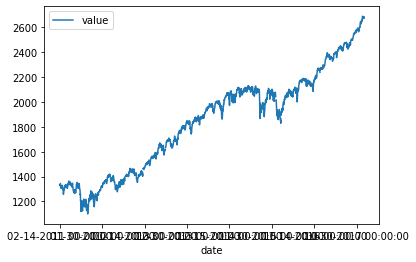

In [5]:
sp_train.plot()

In [6]:
sp_train = sp_train.interpolate()

In [7]:
sp_train.head()

,value
date,
02-14-2011 00:00:00,1332.32
02-15-2011 00:00:00,1328.01
02-16-2011 00:00:00,1336.32
02-17-2011 00:00:00,1340.43
02-18-2011 00:00:00,1343.01


In [44]:
def get_technical(sp500):
    tech = sp500.copy()
    tech['ma7'] = tech['value'].rolling(7).mean()
    tech['ma21'] = tech['value'].rolling(21).mean()
    tech['26ema'] = tech['value'].ewm(span=26).mean()
    tech['12ema'] = tech['value'].ewm(span=12).mean()
    tech['MACD'] = (tech['12ema']-tech['26ema'])
    tech['20sd'] = tech['value'].rolling(20).std()
    tech['upper_band'] = tech['ma21'] + (tech['20sd']*2)
    tech['lower_band'] = tech['ma21'] - (tech['20sd']*2)
    tech['ema'] = tech['value'].ewm(com=0.5).mean()
    tech['momentum'] = tech["value"].diff()
    tech = tech.drop(columns = "value").shift(periods=1)
    tech["value"] = sp500["value"]
    return tech[["value","ma7","ma21","26ema","12ema","MACD","ema","momentum"]]

In [51]:
tech = get_techincal(sp_train)

In [53]:
tech.to_csv("datasets/technical_train.csv")

In [ ]:
def get_technical_indicators(dataset):
    # Create 7 and 21 days Moving Average
    dataset['ma7'] = dataset['price'].rolling(window=7).mean()
    dataset['ma21'] = dataset['price'].rolling(window=21).mean()
    
    # Create MACD
    dataset['26ema'] = pd.ewma(dataset['price'], span=26)
    dataset['12ema'] = pd.ewma(dataset['price'], span=12)
    dataset['MACD'] = (dataset['12ema']-dataset['26ema'])
    
    # Create Bollinger Bands
    dataset['20sd'] = pd.stats.moments.rolling_std(dataset['price'],20)
    dataset['upper_band'] = dataset['ma21'] + (dataset['20sd']*2)
    dataset['lower_band'] = dataset['ma21'] - (dataset['20sd']*2)
    
    # Create Exponential moving average
    dataset['ema'] = dataset['price'].ewm(com=0.5).mean()
    
    # Create Momentum
    dataset['momentum'] = dataset['price']-1
    
    return dataset

In [ ]:
techincal.save()

In [ ]:
def get_technical_indicators(dataset):
    # Create 7 and 21 days Moving Average
    dataset['ma7'] = dataset['value'].rolling(window=7).mean()
    dataset['ma21'] = dataset['value'].rolling(window=21).mean()
    
    # Create MACD
    dataset['26ema'] = pd.ewma(dataset['value'], span=26)
    dataset['12ema'] = pd.ewma(dataset['value'], span=12)
    dataset['MACD'] = (dataset['12ema']-dataset['26ema'])
# Create Bollinger Bands
    dataset['20sd'] = pd.stats.moments.rolling_std(dataset['price'],20)
    dataset['upper_band'] = dataset['ma21'] + (dataset['20sd']*2)
    dataset['lower_band'] = dataset['ma21'] - (dataset['20sd']*2)
    
    # Create Exponential moving average
    dataset['ema'] = dataset['price'].ewm(com=0.5).mean()
    
    # Create Momentum
    dataset['momentum'] = dataset['price']-1
    
    return dataset